In [1]:
from itertools import islice

import h5py

# import multiprocessing
# multiprocessing.set_start_method('fork')

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx.classes.function import path_weight
from scipy.optimize import curve_fit

from tqdm import tqdm

In [2]:
ns_max = 8
dH_max = np.zeros((ns_max, 2))

for ns in range(ns_max):
    f = h5py.File(f"data/dH/ns={ns+1}.jld", "r")
    dHM = np.array(f["dHM"])

    dHM_max = np.max(dHM, axis=0)
    dH_max[ns] = (np.mean(dHM_max), np.std(dHM_max, ddof=1) / np.sqrt(dHM_max.shape[0]))

In [3]:
f = h5py.File(f"data/dH/ns={7}.jld", "r")
dHM = np.array(f["dHM"])

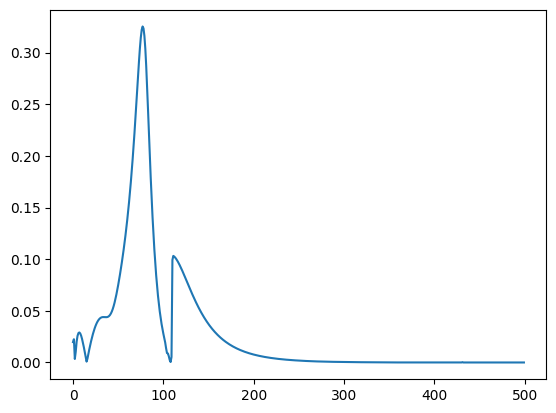

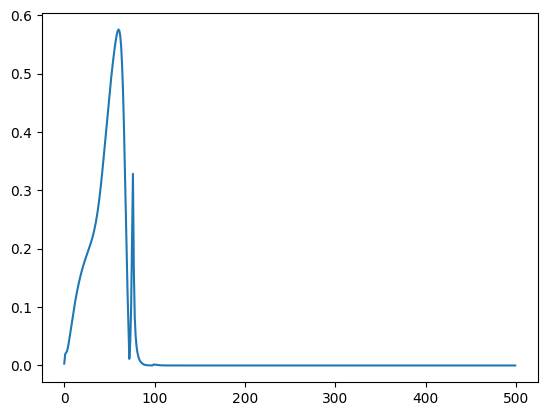

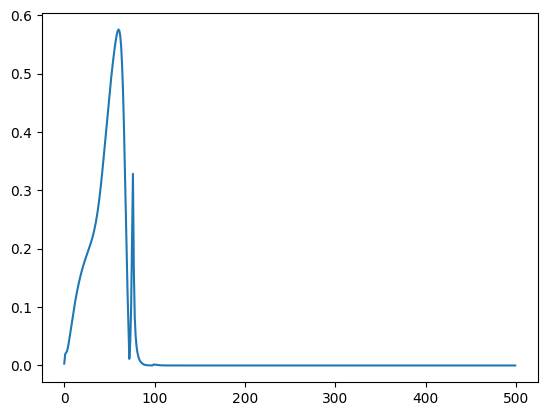

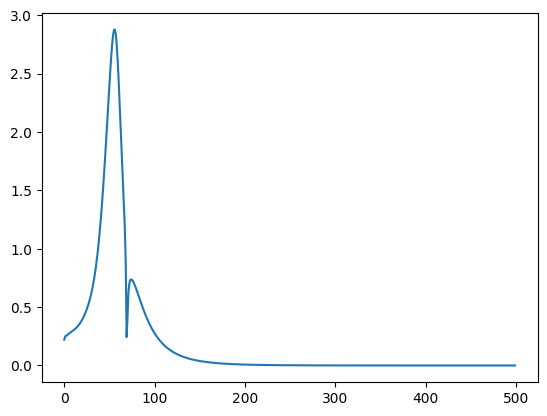

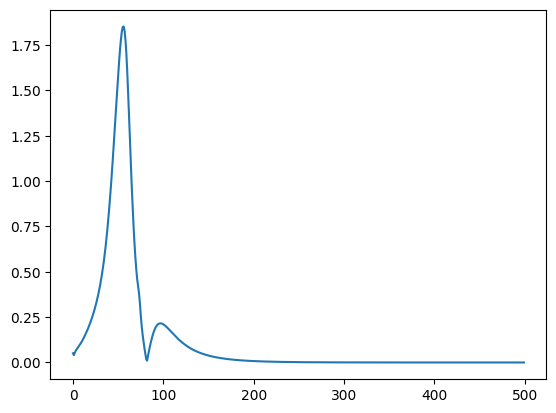

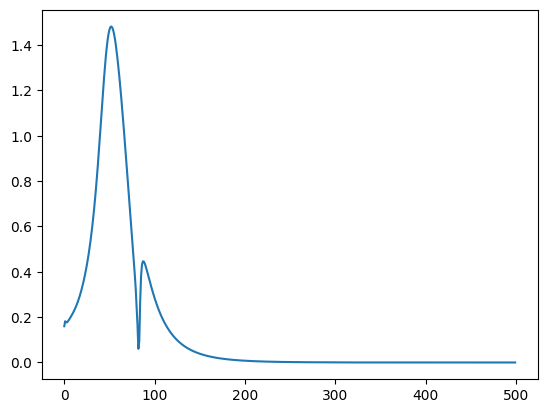

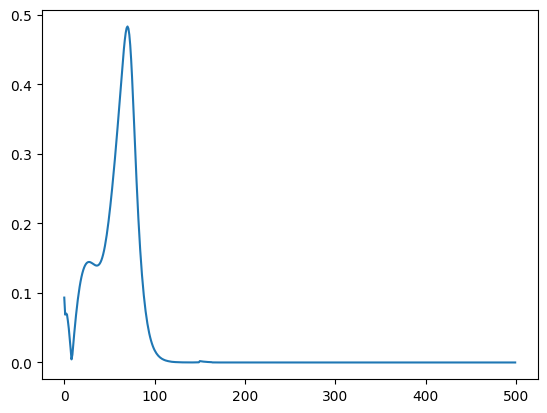

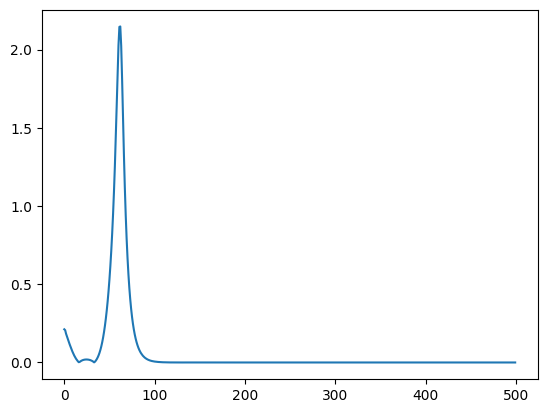

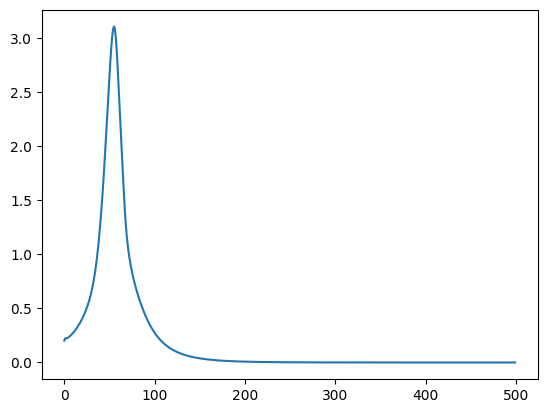

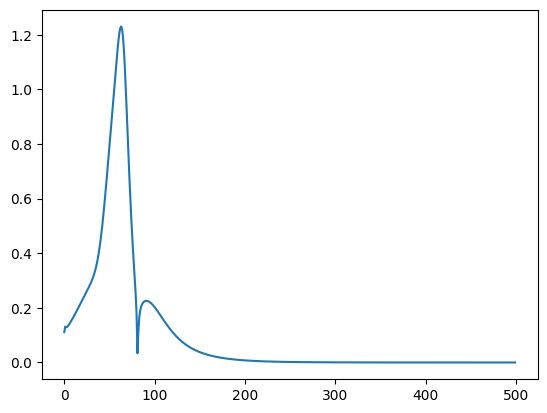

In [4]:
for i in np.random.randint(250, size=10):
    plt.plot(dHM[:, i])
    plt.show()

0.03434834744497544 0.707356187802274
0.001558535785391757 0.01712062492698486


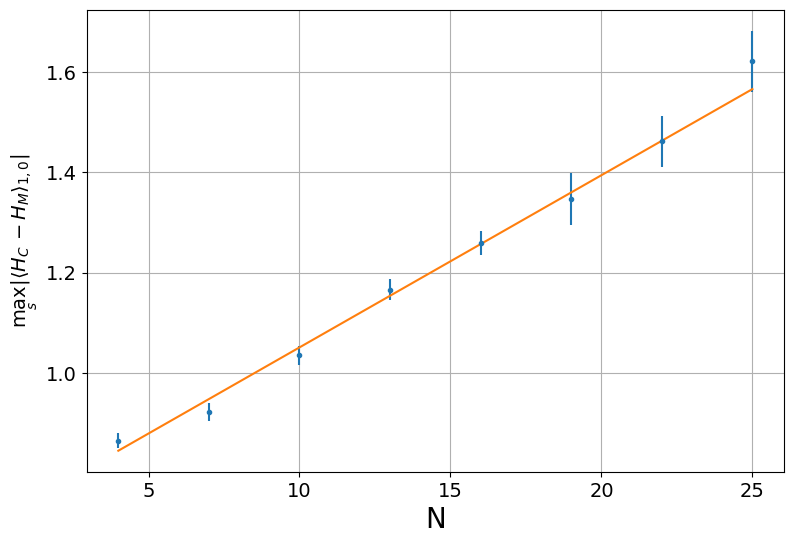

In [7]:
N = 3*np.arange(1, 9) + 1
plt.figure(figsize=(9,6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.errorbar(N, dH_max[:, 0], yerr=dH_max[:, 1], fmt=".")

f_fit = lambda x, a, b: a*x + b
popt, pcov = curve_fit(f_fit, N, dH_max[:, 0], sigma=dH_max[:, 1], absolute_sigma=True)
print(*popt)
print(*np.sqrt(np.diag(pcov)))
plt.plot(N, f_fit(N, *popt))
plt.xlabel("N", fontsize=20)
plt.ylabel("$\max_s | \langle H_C - H_M \\rangle_{1,0} |$", fontsize=14)
plt.grid()

plt.savefig("plots/dH_scaling.pdf")